In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path_clinical_data = os.path.join('raw_data','clinicaltrial_data.csv')
csv_path_drug_data = os.path.join('raw_data','mouse_drug_data.csv')

In [3]:
clinic_df = pd.read_csv(csv_path_clinical_data)
drug_df = pd.read_csv(csv_path_drug_data)

In [4]:
clinic_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
clinic_df = clinic_df.dropna(how='any')
clinic_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
print("Length of Value Counts: {}".format(len(clinic_df['Mouse ID'].value_counts())))
print('Length of Unique Cities: {}'.format(len(clinic_df['Mouse ID'].unique())))

Length of Value Counts: 249
Length of Unique Cities: 249


In [7]:
drug_df.count()

Mouse ID    250
Drug        250
dtype: int64

In [8]:
drug_df = drug_df.dropna(how='any')
drug_df.count()

Mouse ID    250
Drug        250
dtype: int64

In [9]:
print("Length of Value Counts: {}".format(len(drug_df['Mouse ID'].value_counts())))
print('Length of Unique Cities: {}'.format(len(drug_df['Mouse ID'].unique())))

Length of Value Counts: 249
Length of Unique Cities: 249


In [10]:
clinic_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [12]:
test_df = pd.merge(clinic_df,drug_df,how='left',on='Mouse ID')
test_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [13]:
tum_vol_change_df = pd.pivot_table(test_df,
                       values='Tumor Volume (mm3)',
                       index=['Timepoint'],
                       columns=['Drug'],
                       aggfunc=np.mean)
tum_vol_change_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


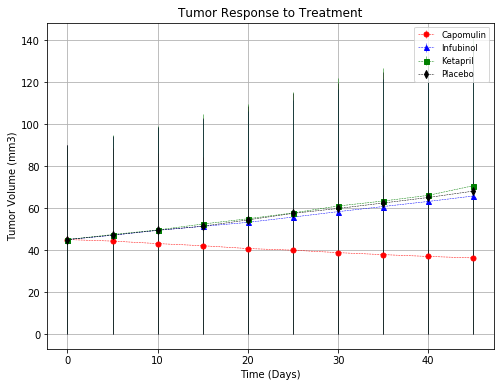

In [35]:
# # Generate the Plot (with Error Bars)
plt.errorbar(tum_vol_change_df.index, tum_vol_change_df["Capomulin"], yerr=tum_vol_change_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_vol_change_df.index, tum_vol_change_df["Infubinol"], tum_vol_change_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_vol_change_df.index, tum_vol_change_df["Ketapril"], yerr=tum_vol_change_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_vol_change_df.index, tum_vol_change_df["Placebo"], yerr=tum_vol_change_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.y
plt.rcParams["figure.figsize"] = [8,6]


In [43]:
tum_met_sites_df = pd.pivot_table(test_df,
                       values='Metastatic Sites',
                       index=['Timepoint'],
                       columns=['Drug'],
                       aggfunc=np.mean)
tum_met_sites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


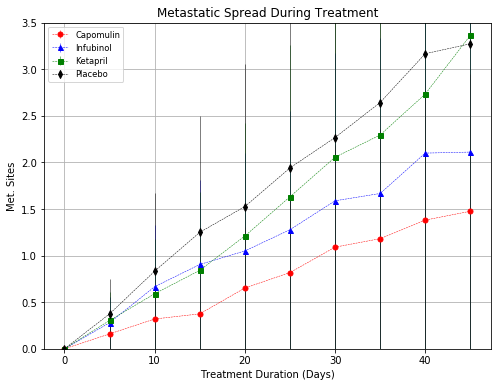

In [45]:
# # Generate the Plot (with Error Bars)
plt.errorbar(tum_met_sites_df.index, tum_met_sites_df["Capomulin"], yerr=tum_met_sites_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_met_sites_df.index, tum_met_sites_df["Infubinol"], tum_met_sites_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_met_sites_df.index, tum_met_sites_df["Ketapril"], yerr=tum_met_sites_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tum_met_sites_df.index, tum_met_sites_df["Placebo"], yerr=tum_met_sites_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.ylim(0,3.5)
plt.rcParams["figure.figsize"] = [8,6]
